In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
DATA_FOLDER = 'data/'
DATA_FILE1 = '10101.csv'
DATA_FILE2 = '1D203.csv'

In [23]:
file1 = DATA_FOLDER + DATA_FILE1
file2 = DATA_FOLDER + DATA_FILE2
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

In [24]:
df1["rawState"].value_counts()

w    43448
n    33698
1     5302
r     3663
2      240
3       32
5       17
Name: rawState, dtype: int64

In [33]:
df1_1 = df1.copy()
df2_1 = df2.copy()

def to_hours(tick):
    return tick / 900.0

df1_1['hours'] = df1_1.index.map(to_hours)
df1_1["day"] = df1_1.index // 21600

df2_1['hours'] = df2_1.index.map(to_hours)
df2_1["day"] = df2_1.index // 21600

mapping = {}

df1_1['cstate'] = df1_1['state'].replace(mapping)

df2_1['cstate'] = df2_1['state'].replace(mapping)
df2_1['cstate'].value_counts()

w    46205
n    35271
r     4924
Name: cstate, dtype: int64

In [34]:
# plot a day of data
def plot_df(data, day, log=False, state="state"):
    df = data[data["day"] == day]

    fig, axs = plt.subplots(2, 1, figsize=(20, 10))

    eeg = sns.lineplot(data = df, x = "hours", y = "EEGv", hue = state, ax=axs[0])
    axs[0].set_title("EEGv")

    emg = sns.lineplot(data = df, x = "hours", y = "EMGv", hue = state, ax=axs[1])
    axs[1].set_title("EMGv")

    if log:
        eeg.set(yscale="log")
        emg.set(yscale="log")

    plt.show()

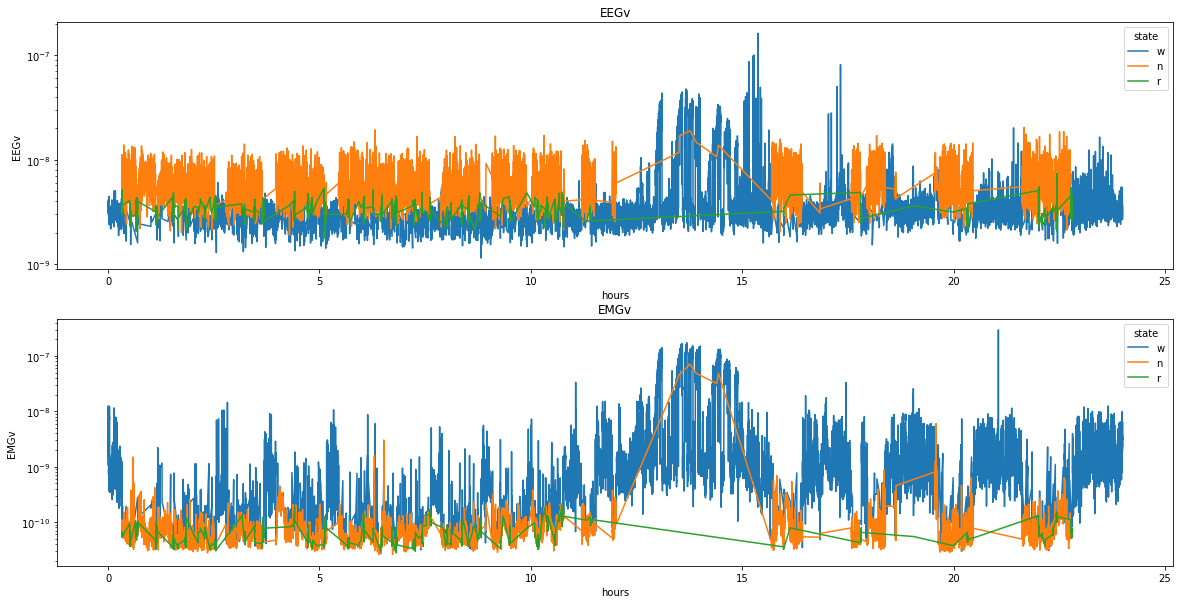

In [28]:
plot_df(data=df1_1, day=0, log=True)

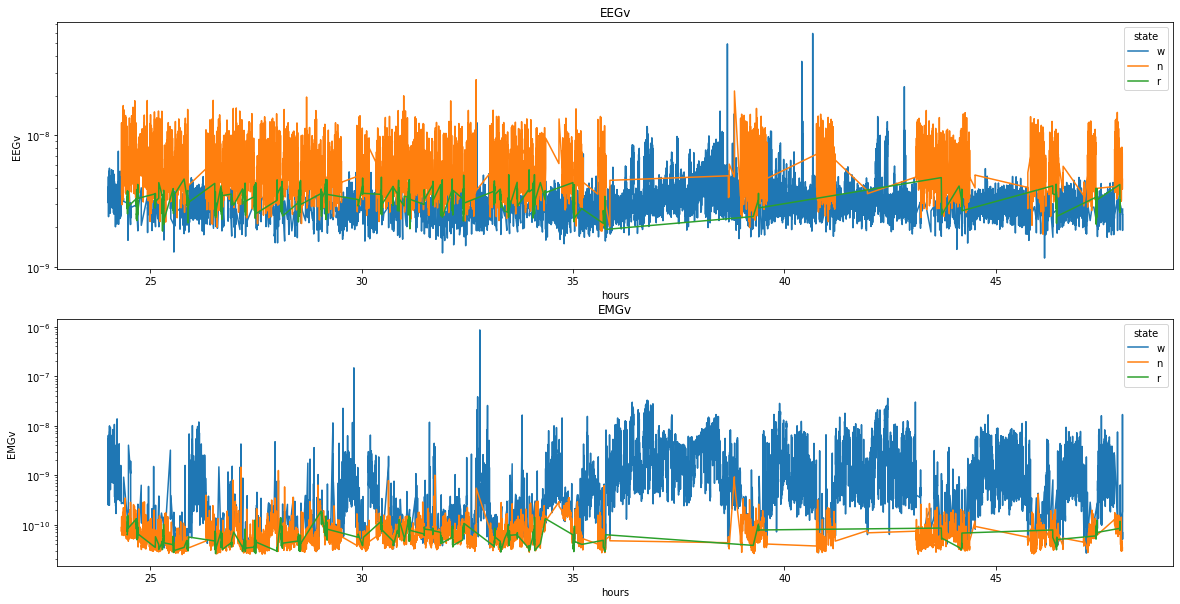

In [29]:
plot_df(data=df1_1, day=1, log=True)

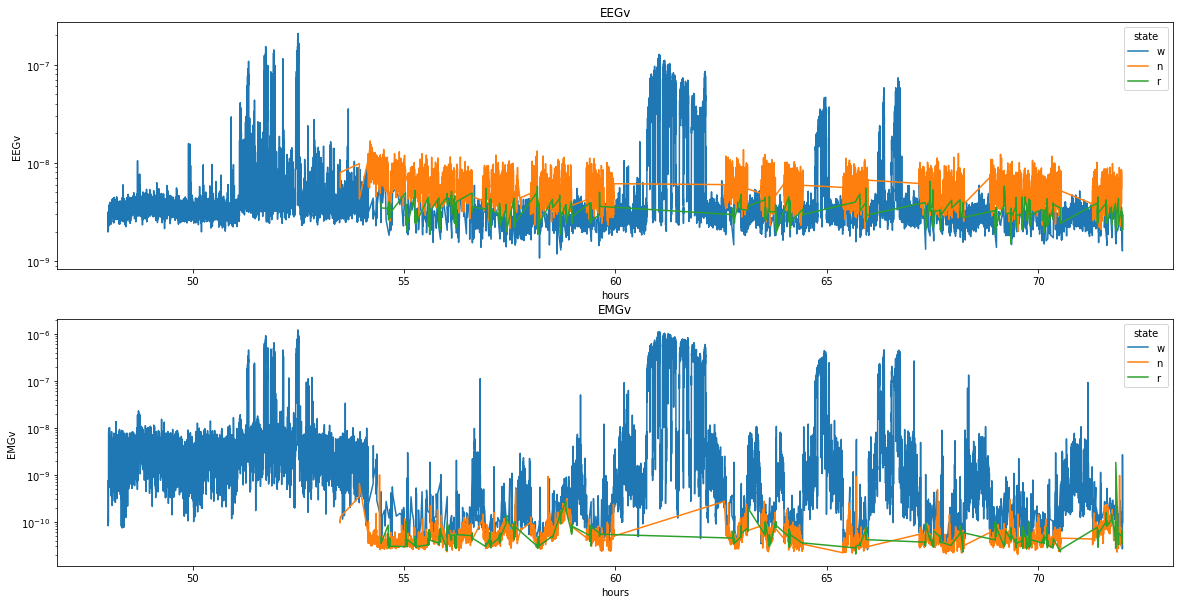

In [30]:
plot_df(data=df1_1, day=2, log=True)

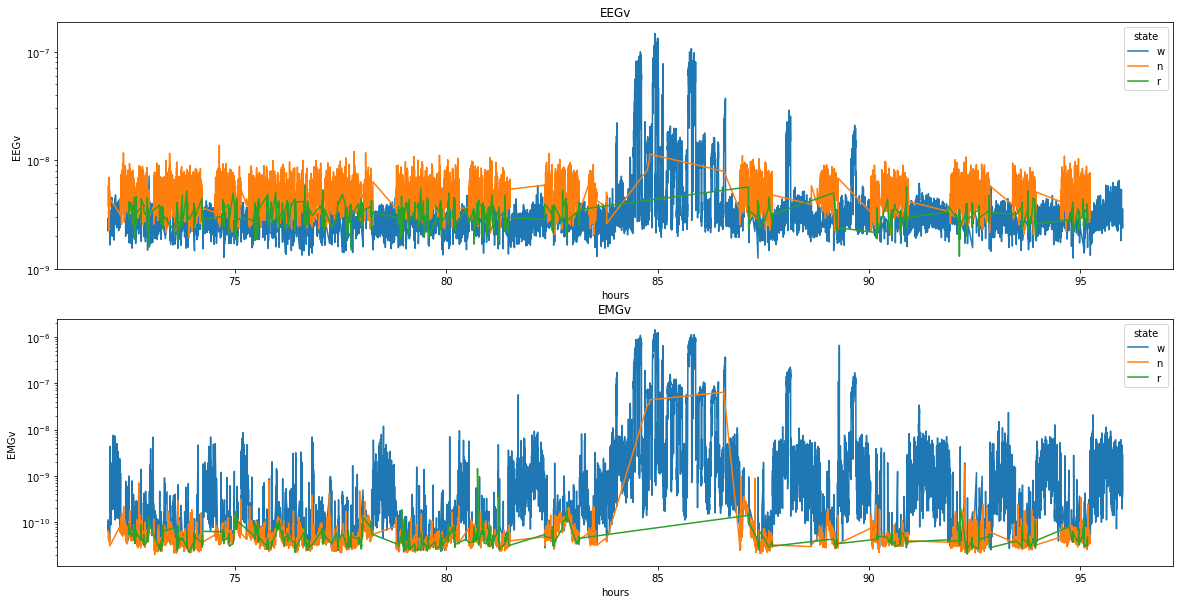

In [31]:
plot_df(data=df1_1, day=3, log=True)

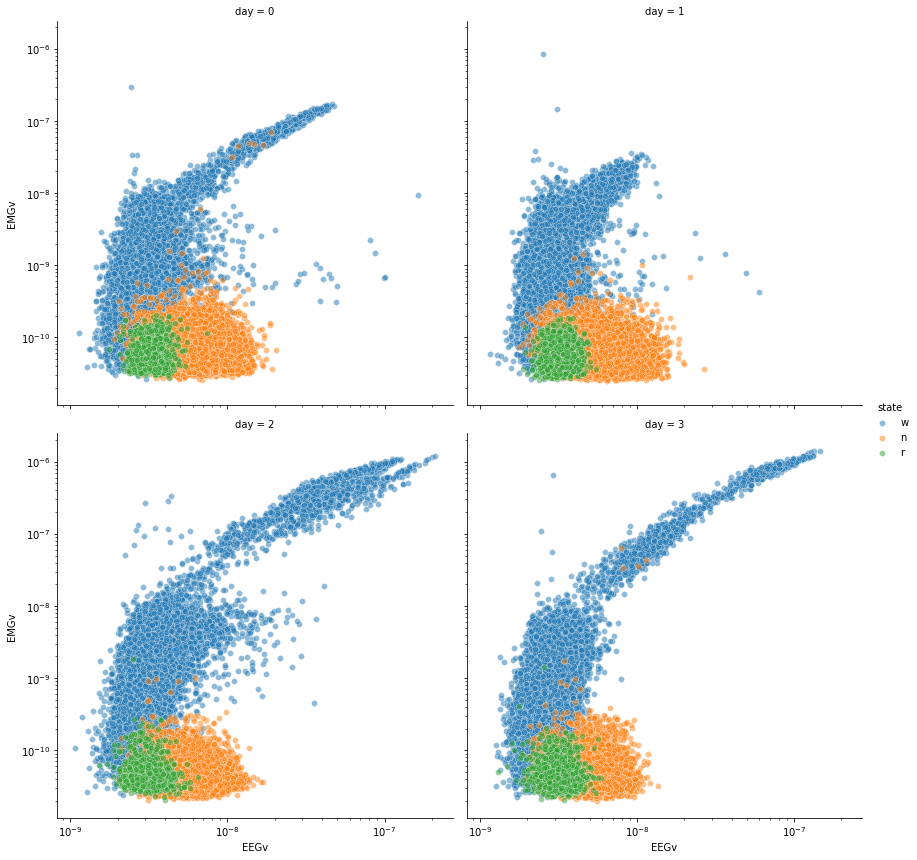

In [32]:
def scatter(data, state="state"):
    g = sns.FacetGrid(data, col="day", hue=state, col_wrap=2, height=6)
    g.map(sns.scatterplot, "EEGv", "EMGv", alpha=.50).add_legend()
    g.set(xscale="log", yscale="log")

    plt.show()

scatter(data=df1_1)

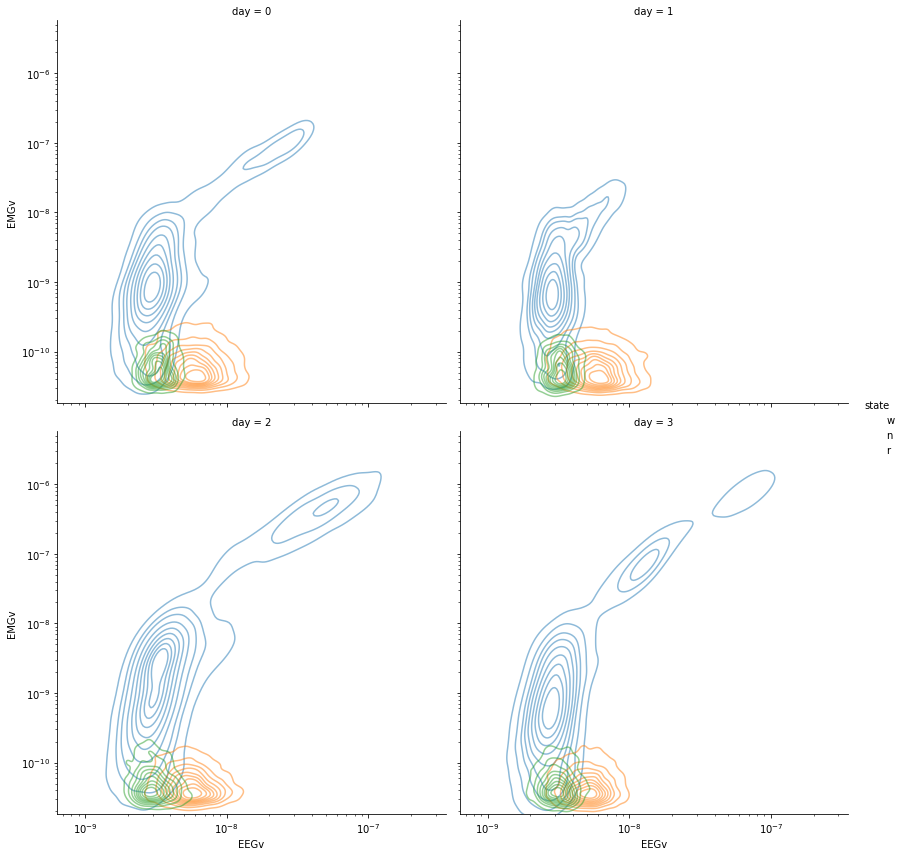

In [19]:
def density(file, state="state"):
    df = pd.read_csv(file)
    
    df['hours'] = df1_1.index.map(to_hours)
    df["day"] = df1_1.index // 21600

    g = sns.FacetGrid(df, col="day", hue=state, col_wrap=2, height=6)
    g.map(sns.kdeplot, "EEGv", "EMGv", fill=False, log_scale=True, alpha=.50).add_legend()

    plt.show()

density(data=df1_1)

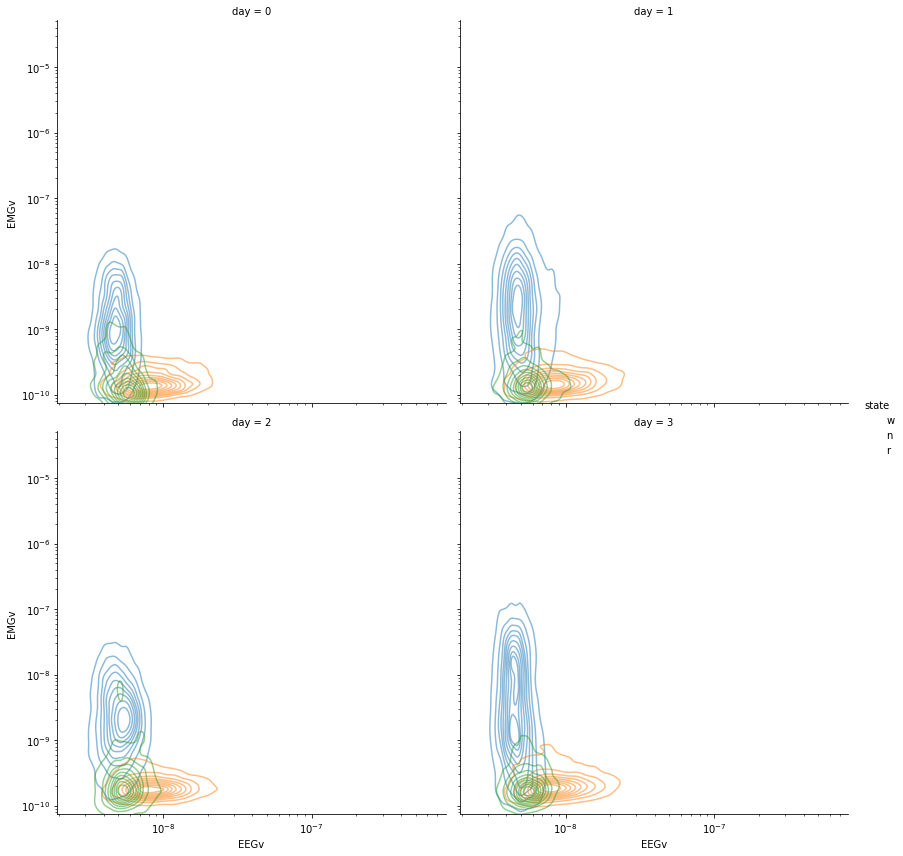

In [35]:
density(data=df2_1)